In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, tlimit, tplot_names
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import datetime
import netCDF4
from netCDF4 import Dataset, num2date
import datetime as dt
from pytplot import get_data
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from dateutil.parser import isoparse as isotoutc
import arrow

## LANL 97A

In [2]:
filename = "/Users/sians/OneDrive/Desktop/LANL_2015/Data file/20150907_LANL-97A_10sec_flux.txt"

from dateutil.parser import isoparse as isotoutc

# Open the file in read mode
with open(filename, "r") as file:
    # Read the first 130 lines into a string array
    lanl_header = []
    for i in range(130):
        line = file.readline()
        lanl_header.append(line.strip())

    # Read the remaining data into a floating-point array
    data_array = []
    for line in file:
        values = line.strip().split()  # Split the line into individual values

        # Convert the ISO timestamp in the first column to Unix timestamp
        iso_timestamp = values[0]
      
        dt=arrow.get(iso_timestamp).datetime
        #print(dt.timestamp())
        
        # Replace the ISO timestamp with the Unix timestamp in the first column
        values[0] = dt.timestamp()

        # Convert the remaining values to float
        float_values = [float(x) for x in values[1:]]
        
        # Add the Unix timestamp and the float values to the float array
        data_array.append([dt] + float_values)

In [3]:
# Extract the first column
time_97 = [row[0] for row in data_array] # first coulmn
# print(timefrac)
lat_97 = [row[1] for row in data_array] #second column
long_97 = [row[3] for row in data_array] #third column
radius_97 = [row[4] for row in data_array] #fourth column
sopa_elec_flux_97= [row[5:14] for row in data_array] #5th to 14 coulmn-
# esp_elec_flux= [row[26:36] for row in data_array] #27 to end coulmn-
# sopa_elec_energy= [row[15:24] for row in data_array]
sopa_ion_flux_97= [row[15:22] for row in data_array] #15th to 26 coulmn-

# energyEflux1=[1122.5,1989.98,2437.21,3074.09,3968.63,5196.15,6841.05,9178.24,16692.5]

#converting time to datetime
time_new_97=[]
for i in range(0,len(time_97)):
    time_new_97= np.append(time_new_97, time_97[i])

14-Jun-23 21:12:23: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\1779206448.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim([0, 1e7])



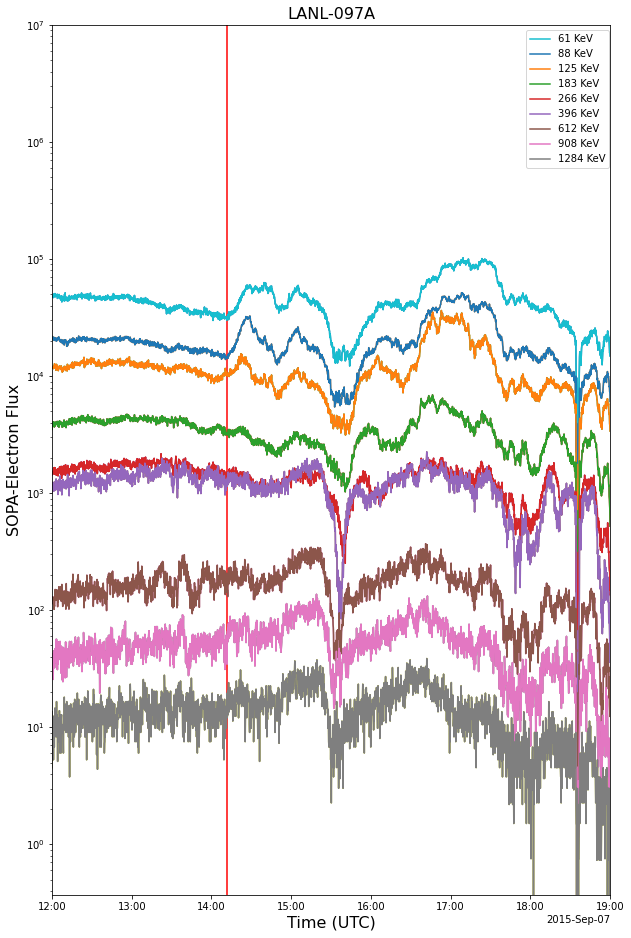

In [4]:
# Plots
# Create a plot with a single y-axis
import datetime as dt
fig, ax1 = plt.subplots(figsize=(10, 16))
ax1.semilogy(time_new_97, sopa_elec_flux_97)
# set limits on the x-axis
ax1.set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 19, 0, 0))

line_date = dt.datetime(2015, 9, 7, 14, 12, 0)
# draw a vertical line at the line date
ax1.axvline(x=line_date, color='r')

####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# ax1.set_xlim(start_date, end_date)
ax1.set_ylim([0, 1e7])
# ax1.axvline(x= line_date, color='r')

ax1.set_xlabel('Time (UTC)', fontsize=16)
ax1.set_ylabel('SOPA-Electron Flux', fontsize=16) #($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')
ax1.set_title('LANL-097A', fontsize=16)

##[61.2373,88.7412,125.499,183.712,266.224,396.863,612.372,908.295,1284.52,1936.49]

ax1.plot(time_new_97,  sopa_elec_flux_97, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])

# Store the subplots in variables
plot_97A = ax1
# subplot2 = axs[1]

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.84, 1))

# plt.subplots_adjust(wspace=0.5, hspace=1)

# Show the plot
plt.show()

# Add a legend to the plot
ax1.legend()


In [5]:
plot_97A

<AxesSubplot:title={'center':'LANL-097A'}, xlabel='Time (UTC)', ylabel='SOPA-Electron Flux'>

## LANL 080

In [6]:
filename = "/Users/sians/OneDrive/Desktop/LANL_2015/Data file/20150907_1991-080_10sec_flux.txt"


from dateutil.parser import isoparse as isotoutc

# Open the file in read mode
with open(filename, "r") as file:
    # Read the first 130 lines into a string array
    lanl_header = []
    for i in range(130):
        line = file.readline()
        lanl_header.append(line.strip())

    # Read the remaining data into a floating-point array
    data_array = []
    for line in file:
        values = line.strip().split()  # Split the line into individual values

        # Convert the ISO timestamp in the first column to Unix timestamp
        iso_timestamp = values[0]
      
        dt=arrow.get(iso_timestamp).datetime
        #print(dt.timestamp())
        
        # Replace the ISO timestamp with the Unix timestamp in the first column
        values[0] = dt.timestamp()

        # Convert the remaining values to float
        float_values = [float(x) for x in values[1:]]
        
        # Add the Unix timestamp and the float values to the float array
        data_array.append([dt] + float_values)

In [7]:
# Extract the first column
time_080 = [row[0] for row in data_array] # first coulmn
# print(timefrac)
lat_080  = [row[1] for row in data_array] #second column
long_080  = [row[3] for row in data_array] #third column
radius_080  = [row[4] for row in data_array] #fourth column
sopa_elec_flux_080 = [row[5:14] for row in data_array] #5th to 14 coulmn-
# esp_elec_flux= [row[26:36] for row in data_array] #27 to end coulmn-
# sopa_elec_energy= [row[15:24] for row in data_array]
sopa_ion_flux_080= [row[15:22] for row in data_array] #15th to 26 coulmn-

# energyEflux1=[1122.5,1989.98,2437.21,3074.09,3968.63,5196.15,6841.05,9178.24,16692.5]

#converting time to datetime
time_new_080 =[]
for i in range(0,len(time_080 )):
    time_new_080 = np.append(time_new_080 , time_080[i])


14-Jun-23 21:12:30: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\2725859668.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_ylim([0, 1e7])



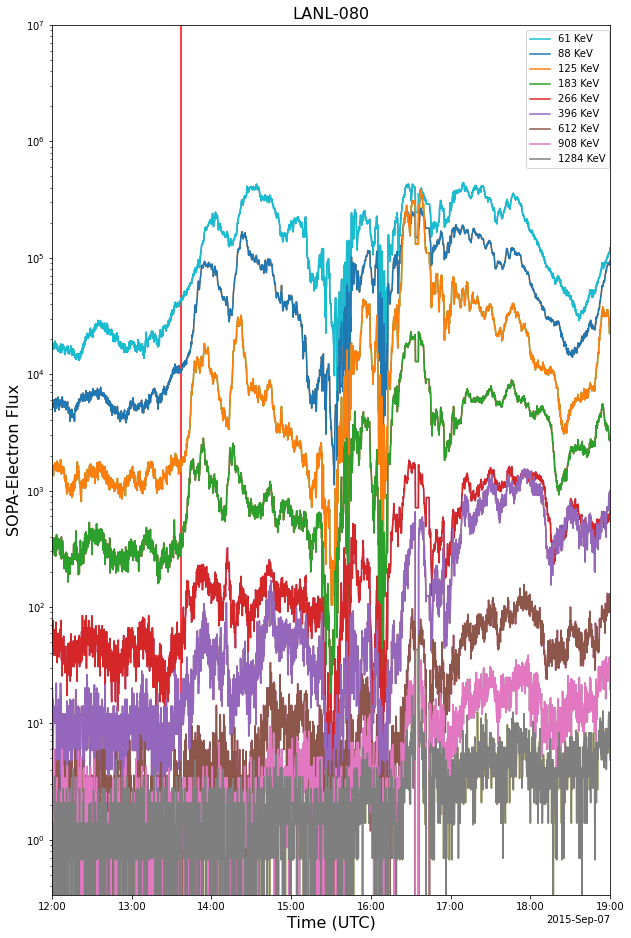

In [8]:
# Plots
import datetime as dt
# Create a plot with a single y-axis
fig, ax2 = plt.subplots(figsize=(10, 16))
ax2.semilogy(time_new_080, sopa_elec_flux_080)
# set limits on the x-axis
ax2.set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 19, 0, 0))

line_date = dt.datetime(2015, 9, 7, 13, 37, 0)
# draw a vertical line at the line date
ax2.axvline(x=line_date, color='r')


####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# ax1.set_xlim(start_date, end_date)
ax2.set_ylim([0, 1e7])
# ax1.axvline(x= line_date, color='r')

ax2.set_xlabel('Time (UTC)', fontsize=16)
ax2.set_ylabel('SOPA-Electron Flux', fontsize=16) #($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')

ax2.set_title('LANL-080', fontsize=16)

##[61.2373,88.7412,125.499,183.712,266.224,396.863,612.372,908.295,1284.52,1936.49]

ax2.plot(time_new_080,  sopa_elec_flux_080, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.84, 1))

plot_080 = ax2

# Show the plot
plt.show()

# Add a legend to the plot
ax2.legend()


In [9]:
plot_080

<AxesSubplot:title={'center':'LANL-080'}, xlabel='Time (UTC)', ylabel='SOPA-Electron Flux'>

## LANL 04A

In [10]:
filename = "/Users/sians/OneDrive/Desktop/LANL_2015/Data file/20150907_LANL-04A_10sec_flux.txt"

from dateutil.parser import isoparse as isotoutc

# Open the file in read mode
with open(filename, "r") as file:
    # Read the first 130 lines into a string array
    lanl_header = []
    for i in range(130):
        line = file.readline()
        lanl_header.append(line.strip())

    # Read the remaining data into a floating-point array
    data_array = []
    for line in file:
        values = line.strip().split()  # Split the line into individual values

        # Convert the ISO timestamp in the first column to Unix timestamp
        iso_timestamp = values[0]
      
        dt=arrow.get(iso_timestamp).datetime
        #print(dt.timestamp())
        
        # Replace the ISO timestamp with the Unix timestamp in the first column
        values[0] = dt.timestamp()

        # Convert the remaining values to float
        float_values = [float(x) for x in values[1:]]
        
        # Add the Unix timestamp and the float values to the float array
        data_array.append([dt] + float_values)

In [11]:
# Extract the first column
time_04 = [row[0] for row in data_array] # first coulmn
# print(timefrac)
lat_04 = [row[1] for row in data_array] #second column
long_04 = [row[3] for row in data_array] #third column
radius_04 = [row[4] for row in data_array] #fourth column
sopa_elec_flux_04= [row[5:14] for row in data_array] #5th to 14 coulmn-
# esp_elec_flux= [row[26:36] for row in data_array] #27 to end coulmn-
sopa_ion_flux_04= [row[15:22] for row in data_array] #15th to 26 coulmn-
# energyEflux1=[1122.5,1989.98,2437.21,3074.09,3968.63,5196.15,6841.05,9178.24,16692.5]

#converting time to datetime
time_new_04=[]
for i in range(0,len(time_04)):
    time_new_04= np.append(time_new_04, time_04[i])

14-Jun-23 21:12:37: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\1597740459.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax3.set_ylim([0, 1e7])



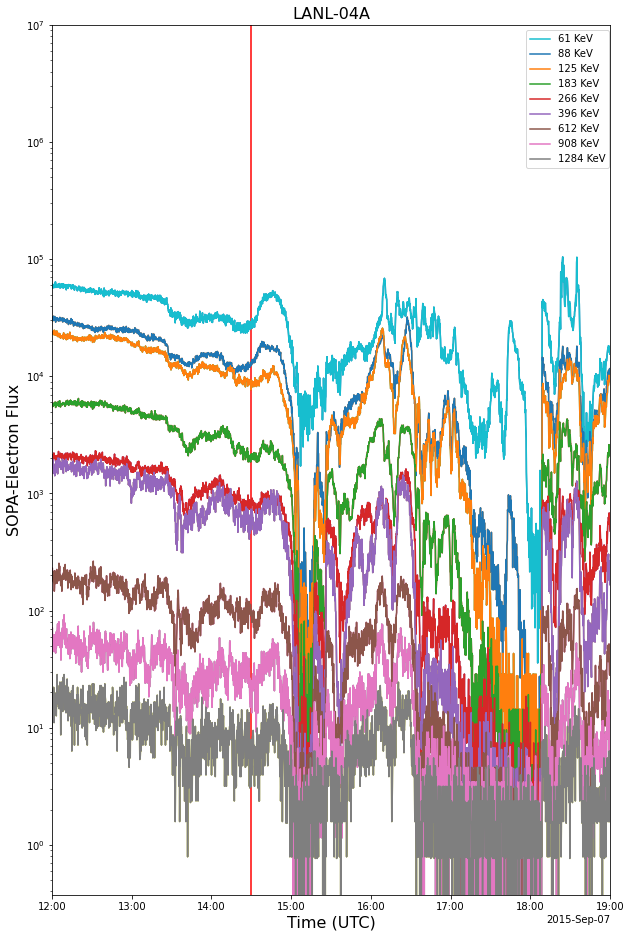

In [12]:
# Plots
# Create a plot with a single y-axis
import datetime as dt
fig, ax3 = plt.subplots(figsize=(10, 16))
ax3.semilogy(time_new_04, sopa_elec_flux_04)
# set limits on the x-axis
ax3.set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 19, 0, 0))

line_date = dt.datetime(2015, 9, 7, 14, 30, 0)
# draw a vertical line at the line date
ax3.axvline(x=line_date, color='r')


####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# ax1.set_xlim(start_date, end_date)
ax3.set_ylim([0, 1e7])
# ax1.axvline(x= line_date, color='r')

ax3.set_xlabel('Time (UTC)', fontsize=16)
ax3.set_ylabel('SOPA-Electron Flux', fontsize=16) #($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')
ax3.set_title('LANL-04A', fontsize=16)

##[61.2373,88.7412,125.499,183.712,266.224,396.863,612.372,908.295,1284.52,1936.49]

ax3.plot(time_new_04,  sopa_elec_flux_04, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])

# ax1.legend(loc='upper right')

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.84, 1))

# Show the plot
plt.show()
# Add a legend to the plot
ax3.legend()


In [13]:
plot_04A = ax3

In [14]:
plot_04A

<AxesSubplot:title={'center':'LANL-04A'}, xlabel='Time (UTC)', ylabel='SOPA-Electron Flux'>

14-Jun-23 21:54:03: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\3631048273.py:25: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0].set_ylim(0, 1e6)

14-Jun-23 21:54:04: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\3631048273.py:40: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[1].set_ylim(0, 1e5)

14-Jun-23 21:54:04: C:\Users\sians\AppData\Local\Temp\ipykernel_25816\3631048273.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[2].set_ylim(0, 1e5)



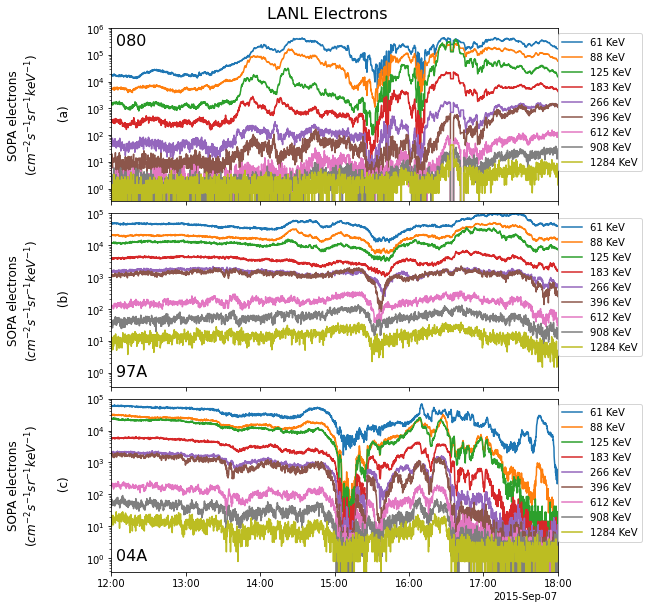

In [74]:
import matplotlib.pyplot as plt
import datetime as dt

# Assuming you have the plot data for plot_080, plot_97A, and plot_04A

# Create a figure and subplots in a vertical arrangement
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))
# Create a figure and subplots in a vertical arrangement
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)


# Set the x-axis limits for all plots
axs[0].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))
axs[1].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))
axs[2].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))

# $cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$

# Plot the data for the first plot and label it as 'a'
axs[0].plot(time_new_080, sopa_elec_flux_080, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])
axs[0].set_ylabel('SOPA electrons\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (a)', rotation=90, size='large', labelpad=15)
axs[0].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Store the x-axis limits of the first plot
x_min, x_max = axs[0].get_xlim()
axs[0].set_ylim(0, 1e6)
# Add text inside the panel of the first plot
axs[0].text(0.01, 0.97, '080', transform=axs[0].transAxes, fontsize=16, ha='left', va='top')

# axs[0].set_ylabel('SOPA electrons')
# Add a legend for the first plot
axs[0].legend(['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV', '1936 KeV'], loc='upper right', bbox_to_anchor=(1.20, 1))


#Plot the data for the third plot and label it as 'c'
axs[1].plot(time_new_97, sopa_elec_flux_97, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])  # Replace x_04A and y_04A with your actual data
axs[1].set_ylabel('SOPA electrons\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (b)', rotation=90, size='large', labelpad=15)
axs[1].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Set the same x-axis limits for the third plot as the first plot
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(0, 1e5)
axs[1].text(0.01, 0.13,'97A', transform=axs[1].transAxes, fontsize=16, ha='left', va='top')

axs[1].legend(['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV', '1936 KeV'], loc='upper right', bbox_to_anchor=(1.20, 1))


# Plot the data for the second plot and label it as 'b'
axs[2].plot(time_new_04, sopa_elec_flux_04, label=['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV'])  # Replace x_97A and y_97A with your actual data
axs[2].set_ylabel('SOPA electrons\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (c)', rotation=90, size='large', labelpad=15)
axs[2].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Set the same x-axis limits for the second plot as the first plot
axs[2].set_xlim(x_min, x_max)
axs[2].set_ylim(0, 1e5)
axs[2].legend(['61 KeV', '88 KeV', '125 KeV', '183 KeV', '266 KeV', '396 KeV', '612 KeV', '908 KeV', '1284 KeV', '1936 KeV'], loc='upper right', bbox_to_anchor=(1.20, 1))
axs[2].text(0.01, 0.05, '04A', transform=axs[2].transAxes, fontsize=16, ha='left', va='bottom')



# Set common y-axis label for all subplots
# fig.text(0.005, 0.5, 'SOPA Electrons', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.07)

# Add a figure title
fig.suptitle("LANL Electrons", fontsize=16, y=0.91)


# Display the figure
plt.show()


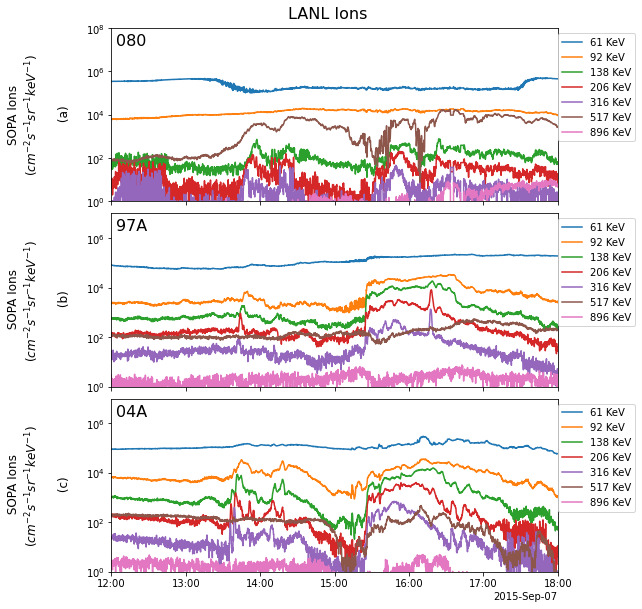

In [75]:
import matplotlib.pyplot as plt
import datetime as dt

# Assuming you have the plot data for plot_080, plot_97A, and plot_04A

# Create a figure and subplots in a vertical arrangement
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))
# Create a figure and subplots in a vertical arrangement
fig, ax = plt.subplots(3, 1, figsize=(8, 10), sharex=True)


# Set the x-axis limits for all plots
ax[0].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))
ax[1].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))
ax[2].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))


# Plot the data for the first plot and label it as 'a'
ax[0].plot(time_new_080, sopa_ion_flux_080, label=['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'])
ax[0].set_ylabel('SOPA Ions\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (a)', rotation=90, size='large', labelpad=15)
ax[0].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Store the x-axis limits of the first plot
x_min, x_max = ax[0].get_xlim()
ax[0].set_ylim(1e0, 1e8)
# Add a legend for the first plot
ax[0].legend(['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'], loc='upper right', bbox_to_anchor=(1.185, 1))
ax[0].text(0.01, 0.97, '080', transform=ax[0].transAxes, fontsize=16, ha='left', va='top')


#Plot the data for the third plot and label it as 'c'
ax[1].plot(time_new_97, sopa_ion_flux_97, label=['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'])  # Replace x_04A and y_04A with your actual data
ax[1].set_ylabel(' SOPA Ions\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (b)', rotation=90, size='large', labelpad=15)
ax[1].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Set the same x-axis limits for the third plot as the first plot
ax[1].set_xlim(x_min, x_max)
ax[1].set_ylim(1e0, 1e7)
ax[1].legend(['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'], loc='upper right', bbox_to_anchor=(1.185, 1))
ax[1].text(0.01, 0.97,'97A', transform=ax[1].transAxes, fontsize=16, ha='left', va='top')

# Plot the data for the second plot and label it as 'b'
ax[2].plot(time_new_04, sopa_ion_flux_04, label=['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'])  # Replace x_97A and y_97A with your actual data
ax[2].set_ylabel(' SOPA Ions\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (c)', rotation=90, size='large', labelpad=15)
ax[2].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Set the same x-axis limits for the second plot as the first plot
ax[2].set_xlim(x_min, x_max)
ax[2].set_ylim(1e0, 1e7)
ax[2].legend(['61 KeV','92 KeV','138 KeV','206 KeV','316 KeV','517 KeV','896 KeV'], loc='upper right', bbox_to_anchor=(1.185, 1))
ax[2].text(0.01, 0.88, '04A', transform=ax[2].transAxes, fontsize=16, ha='left', va='bottom')





# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.07)

# Add a figure title
fig.suptitle("LANL Ions", fontsize=16, y=0.91)



# Display the figure
plt.show()
